In [95]:
import sys
import os
base = dirname(os.getcwd())
sys.path.insert(0, base + '/util')
from image_processing_fns import *
import numpy as np

In [64]:
im_path = base + '/data/test/images'
matrix_path = base + '/data/test/images_numpy'
pickles_path = base + '/data/test/features/feat_dict.p'
MAX_ARRAY_SIZE = 100

In [45]:
from __future__ import absolute_import
from __future__ import print_function

import pickle

import numpy
from six.moves import range

from  scipy.spatial import KDTree

all_feats = pickle.load(open(pickles_path, "rb"))
count = -1

N = len(all_feats)
D = 4096
X = dict()

In [71]:
nparr = np.ndarray((N,D))
for k in all_feats:
    nparr[k-1] = all_feats[k]
print("Size of Input array", nparr.shape)

Size of Input array (569, 4096)


In [72]:
print('Building tree using scipy.spatial')
T = KDTree(nparr)
print('done.')

Building tree using scipy.spatial
done.


In [80]:
knn_1 = T.query(nparr[500], k=2)
print(('KNN(1)           : ', knn_1))

('KNN(1)           : ', (array([  0.        ,  72.95685707]), array([500, 238])))


In [65]:
array_dict = dict()
for m in os.listdir(matrix_path):
    array = np.load(os.path.join(matrix_path, m))
    array_num = int(m[:-4])
    
    if array_num in array_dict:
        array_dict[array_num].extend(array)
    else:
        array_dict[array_num] = array
    print("Loaded array {}, array num: {}".format(m, array_num))
for k in array_dict:
    print (len(array_dict[k]))

Loaded array 0.npy, array num: 0
Loaded array 1.npy, array num: 1
Loaded array 2.npy, array num: 2
Loaded array 3.npy, array num: 3
Loaded array 4.npy, array num: 4
Loaded array 5.npy, array num: 5
100
100
100
100
100
69


In [93]:
from math import floor
def test_ims(arraydict, max_array_size, idxs):
    
    for i in idxs:
        i = int(i)
        array_num = floor(i/ 100)
        im_indx = i % 100
        im = arraydict[array_num][im_indx]
        fname = str(array_num * max_array_size + im_indx ) + ".jpg"
        print("Matrix num: {} idx: {}: image file: {}".format(
            array_num, im_indx, fname))
        print("near neighbor image")
        displayImageInline(im)
    print()
    print()


def print_og(idx):
    print("original image")
    test_ims(array_dict, MAX_ARRAY_SIZE, [str(idx)])


[ 14 507]
********Original*******
original image
Matrix num: 0 idx: 14: image file: 14.jpg
near neighbor image


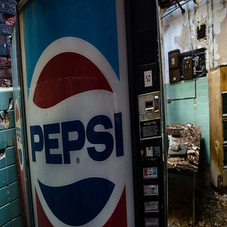



********Neighbor*******
original image
Matrix num: 5 idx: 7: image file: 507.jpg
near neighbor image


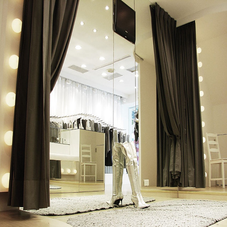



[ 44 437]
********Original*******
original image
Matrix num: 0 idx: 44: image file: 44.jpg
near neighbor image


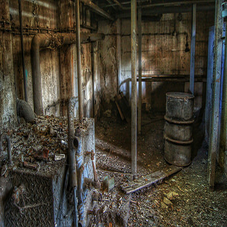



********Neighbor*******
original image
Matrix num: 4 idx: 37: image file: 437.jpg
near neighbor image


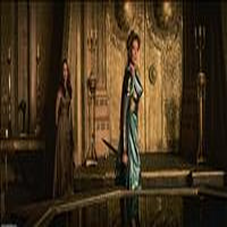



[ 86 324]
********Original*******
original image
Matrix num: 0 idx: 86: image file: 86.jpg
near neighbor image


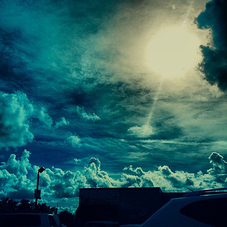



********Neighbor*******
original image
Matrix num: 3 idx: 24: image file: 324.jpg
near neighbor image


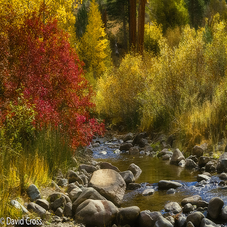



[  1 111]
********Original*******
original image
Matrix num: 0 idx: 1: image file: 1.jpg
near neighbor image


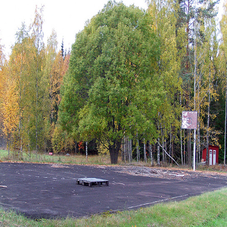



********Neighbor*******
original image
Matrix num: 1 idx: 11: image file: 111.jpg
near neighbor image


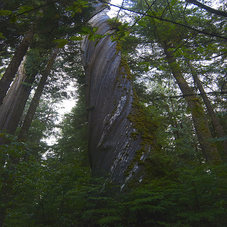



[ 57 123]
********Original*******
original image
Matrix num: 0 idx: 57: image file: 57.jpg
near neighbor image


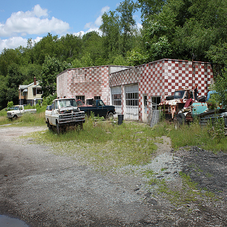



********Neighbor*******
original image
Matrix num: 1 idx: 23: image file: 123.jpg
near neighbor image


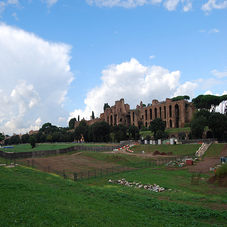



[ 45 453]
********Original*******
original image
Matrix num: 0 idx: 45: image file: 45.jpg
near neighbor image


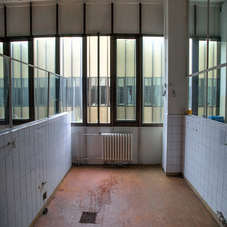



********Neighbor*******
original image
Matrix num: 4 idx: 53: image file: 453.jpg
near neighbor image


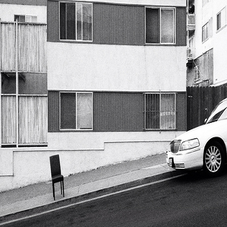



[ 62 260]
********Original*******
original image
Matrix num: 0 idx: 62: image file: 62.jpg
near neighbor image


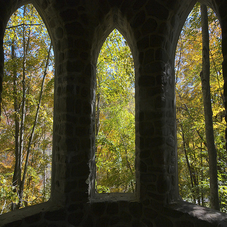



********Neighbor*******
original image
Matrix num: 2 idx: 60: image file: 260.jpg
near neighbor image


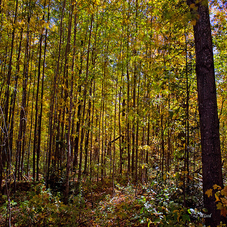



[ 92 372]
********Original*******
original image
Matrix num: 0 idx: 92: image file: 92.jpg
near neighbor image


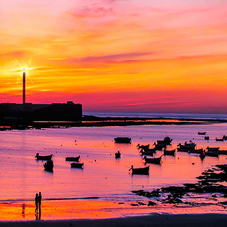



********Neighbor*******
original image
Matrix num: 3 idx: 72: image file: 372.jpg
near neighbor image


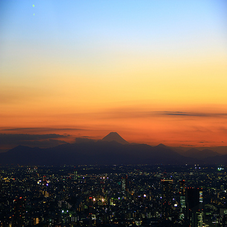



[35 38]
********Original*******
original image
Matrix num: 0 idx: 35: image file: 35.jpg
near neighbor image


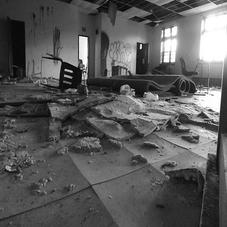



********Neighbor*******
original image
Matrix num: 0 idx: 38: image file: 38.jpg
near neighbor image


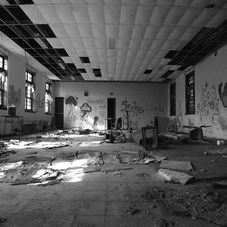



[ 21 297]
********Original*******
original image
Matrix num: 0 idx: 21: image file: 21.jpg
near neighbor image


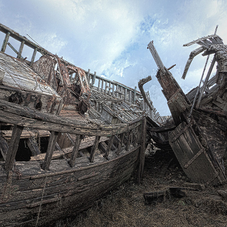



********Neighbor*******
original image
Matrix num: 2 idx: 97: image file: 297.jpg
near neighbor image


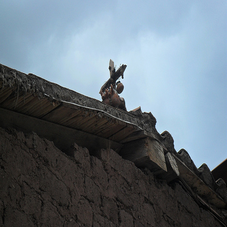

In [94]:


### takes 10 random images, prints image closest to it
import random

for i in range(10):
    random_image = random.randrange(0, 100)              
    distance, neighbours = T.query(nparr[random_image], k=2)
    print(neighbours)
    print("********Original*******") 
    print_og(random_image)
    print("********Neighbor*******") 
    print_og(neighbours[1])

